In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.artist import Artist

In [2]:
alcohol_data = pd.read_csv("alcohol-consumption-in-15-19-year-olds.csv")
depresion_data = pd.read_csv("prevalence-of-depression-by-age.csv")
psychiatriests_data = pd.read_excel("psychiatrzy.xlsx")
suicides_data = pd.read_excel("samobojstwa.xlsx")
hapiness_data = pd.read_csv('szczescie.csv', sep=' ')

In [3]:
depresion_poland_df = depresion_data[depresion_data['Entity'] == "Poland"]
column_names = ['Enitity', "Code", "Year", "20-24", "10-14", "Wszyscy", "70+", "30-34", "15-19", "25-29", "50-69", "Std", "15-49"]
depresion_poland_df = depresion_poland_df.set_axis(column_names, axis=1)
depresion_poland_df = depresion_poland_df.reset_index()
years = depresion_poland_df['Year'].tolist()
depresion_poland_df = depresion_poland_df[["15-19", "20-24", "25-29", "30-34", "Wszyscy"]]

MovieWriter Pillow unavailable; using Pillow instead.


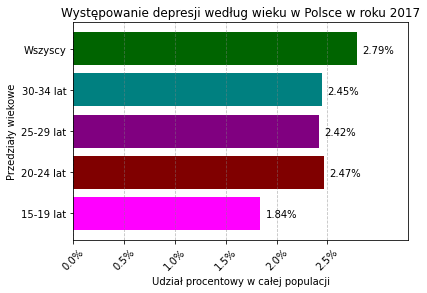

In [4]:
fig, ax = plt.subplots()
texts = []
color = ['magenta', 'maroon', 'purple', 'teal',  'darkgreen']
bars = plt.barh(np.arange(5), depresion_poland_df.loc[0].tolist(), color=color)
yticks = [key+" lat" if key != "Wszyscy" else key for key in depresion_poland_df.keys()]
plt.yticks(np.arange(5), yticks)
plt.ylabel("Przedziały wiekowe")
values = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5]
xticks = [str(value)+"%" for value in values]
plt.xticks(values, xticks)
plt.xlabel("Udział procentowy w całej populacji")
ax.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.5)
plt.title("Występowanie depresji według wieku w Polsce w roku 1990")
for tick in ax.get_xticklabels():
    tick.set_rotation(45)


def animate(i):
    for text in texts:
        Artist.set_visible(text, False)
    ax.set_yticks(np.arange(5), yticks)
    for j, key in enumerate(depresion_poland_df.keys()):
        value = depresion_poland_df[key].loc[i]
        bars[j].set_width(value)
        text = str(round(value, 2))+"%"
        tmp = plt.text(value+0.05, j-.1, s=text)
        texts.append(tmp)
    max_value = depresion_poland_df.max(axis=1)[i]
    ax.set_xlim(0, max_value+.5)
    ax.set_title("Występowanie depresji według wieku w Polsce w roku "+str(years[i]))

    
ani = animation.FuncAnimation(fig, animate, frames=len(depresion_poland_df.index))
ani.save('Wystepowanie_depresji.gif', writer='Pillow', fps=1, dpi=100)

plt.show()

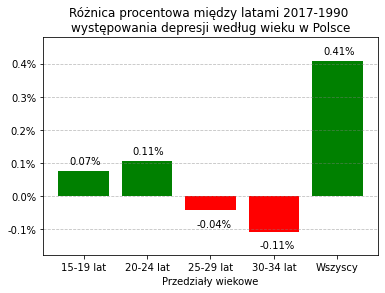

In [5]:
diff_among_time = [0 for _ in depresion_poland_df]
last_index = len(depresion_poland_df.index)-1
for i, key in enumerate(depresion_poland_df.keys()):
    diff_among_time[i] = depresion_poland_df[key].loc[last_index] - depresion_poland_df[key].loc[0]
colors = ['green' if value>0 else 'red' for value in diff_among_time]

plt.bar(np.arange(5), diff_among_time, color=colors)
xticks = [key+" lat" if key != "Wszyscy" else key for key in depresion_poland_df.keys()]
plt.xticks(np.arange(5), xticks)
plt.xlabel("Przedziały wiekowe")
yticks = [-0.1, 0.0, .1, .2, .3, .4]
yticks = [str(tick)+"%" for tick in yticks]
plt.yticks(np.arange(-0.1, 0.5, 0.1), yticks)

plt.ylim(min(diff_among_time)-0.07, max(diff_among_time)+0.07)
plt.grid(True, linestyle='--', which='major', axis='y', color='grey', alpha=.5)
plt.title("Różnica procentowa między latami 2017-1990 \nwystępowania depresji według wieku w Polsce")
for i, value in enumerate(diff_among_time):
        text = str(round(value, 2))+"%"
        value = value+0.02 if value>0 else value-0.05  
        plt.text(i-0.225, value, s=text)
plt.savefig("Różnica porcentowa - depresja.png", dpi=300)
plt.show()